In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## **Explaratory Data Analysis**

In [123]:
df.shape

(32561, 15)

In [124]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [125]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [126]:
# Renaming column names

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
              'occupation', 'relationship', 'race', 'sex', 'capital_gain', 
              'capital_loss', 'hours_per_week', 'native_country',  'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [127]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [128]:
# Summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [129]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [130]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [131]:
# Finding categorical variables

categorical = [var for var in df.columns if df[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are: \n\n', categorical)

There are 9 categorical variables

The categorical variables are: 

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


### Summary of categorical variables


- There are 9 categorical variables. 


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

In [132]:
# Checking for missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [133]:
# Viewing frequency counts of values in categorical variables

for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [134]:
# Viewing frequency distribuion of categorical variables

for var in categorical:
    print(df[var].value_counts() / np.float64(len(df)))

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: coun

Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, we have to replace `?` with `NaN` so that Python can detect these missing values.

We will explore these variables and replace `?` with `NaN`.

In [135]:
df['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [136]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [137]:
# Replacing '?' values in workplace variable with 'NaN'

df['workclass'].replace('?', np.nan, inplace = True)

In [138]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [139]:
# Checking labels in occupation variable 

df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [140]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [141]:
# Replacing '?' in occupation variable with 'NaN'

df['occupation'].replace('?', np.nan, inplace = True)

In [142]:
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [143]:
# Checking labels in native_country variable

df.native_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [144]:
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [145]:
# Replacing '?' in native_country variable with 'NaN'

df.native_country.replace('?', np.nan, inplace = True)

In [146]:
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [147]:
# Again checking for missing values in categorical variables 

df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, we will check for high cardinality.

In [148]:
# checking for cardinality in catrgorical variables

for var in categorical:
    print(var, 'contain', len(df[var].unique()), 'labels')

workclass contain 9 labels
education contain 16 labels
marital_status contain 7 labels
occupation contain 15 labels
relationship contain 6 labels
race contain 5 labels
sex contain 2 labels
native_country contain 42 labels
income contain 2 labels


We can see that `native_country` column has a large number of labels. We will check for cardinality after train-test-split.

In [149]:
# Finding numerical variables

numerical = [var for var in df.columns if df[var].dtype != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are: ', numerical)

There are 6 numerical variables

The numerical variables are:  ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [150]:
# Viewing the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


### Summary of numerical variables


- There are 6 numerical variables. 


- These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.


- All of the numerical variables are of discrete data type.

In [151]:
# Checking missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

## **Declaring Feature Vector and Target Variable**

In [152]:
x = df.drop(['income'], axis = 1)
y =  df['income']

In [153]:
# Splitting data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [154]:
X_train.shape, X_test.shape

((26048, 14), (6513, 14))

### **Feature Engineering**

In [155]:
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [156]:
# Displaying categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [157]:
# Displaying numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [158]:
# Engineering missing values in the categorical variables
# Printing percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass         0.056242
education         0.000000
marital_status    0.000000
occupation        0.056473
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017928
dtype: float64

In [159]:
# Printing categorical variables with missing values

for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.056242321867321865
occupation 0.056472665847665846
native_country 0.017928439803439805


In [160]:
# Impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace = True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace = True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace = True)

In [161]:
# Checking for missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [162]:
# Checking for missing values in categorical variables in x_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [163]:
# Checking for missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [164]:
# Checking for missing values in x_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Encoding categorical variable

In [165]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [166]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
15282,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
24870,Local-gov,Bachelors,Never-married,Craft-repair,Own-child,White,Male,United-States
18822,Private,HS-grad,Never-married,Adm-clerical,Unmarried,Black,Female,United-States
26404,Private,HS-grad,Widowed,Machine-op-inspct,Not-in-family,White,Female,United-States
7842,Private,Bachelors,Never-married,Farming-fishing,Own-child,White,Female,United-States


In [167]:
import category_encoders as ce

In [168]:
# Encoding remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols = ['workclass', 'education', 'marital_status', 'occupation', 
                                   'relationship', 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [169]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
15282,41,1,0,0,0,0,0,0,0,208330,...,0,0,0,0,0,0,0,0,0,0
24870,25,0,1,0,0,0,0,0,0,191921,...,0,0,0,0,0,0,0,0,0,0
18822,25,1,0,0,0,0,0,0,0,180212,...,0,0,0,0,0,0,0,0,0,0
26404,53,1,0,0,0,0,0,0,0,123092,...,0,0,0,0,0,0,0,0,0,0
7842,24,1,0,0,0,0,0,0,0,122272,...,0,0,0,0,0,0,0,0,0,0


In [170]:
X_train.shape

(26048, 105)

In [171]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,56,1,0,0,0,0,0,0,0,274475,...,0,0,0,0,0,0,0,0,0,0
8950,19,1,0,0,0,0,0,0,0,237455,...,0,0,0,0,0,0,0,0,0,0
7838,23,1,0,0,0,0,0,0,0,125491,...,0,0,0,0,0,0,0,0,0,0
16505,37,0,0,0,0,0,1,0,0,48779,...,0,0,0,0,0,0,0,0,0,0
19140,49,1,0,0,0,0,0,0,0,423222,...,0,0,0,0,0,0,0,0,0,0


In [172]:
X_test.shape

(6513, 105)

Now We have out training and testing set ready for model building.

### **Feature Scaling**

In [173]:
cols = X_train.columns

In [174]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [175]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [176]:
X_train = pd.DataFrame(X_train, columns = [cols])

In [177]:
X_test = pd.DataFrame(X_test, columns = [cols])

In [178]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.246270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.60,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.109348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.464983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.471825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Gaussian Naive Bayes Classifier Model Training**

In [179]:
# Training Gaussian Naive Bayes classifier on the training set

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# Fitting the model
gnb.fit(X_train, y_train)

GaussianNB()

### **Predicting The Results**

In [180]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

### **Checking the Accuracy Score**

In [181]:
from sklearn.metrics import accuracy_score

print('Gaussian NB Model Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Gaussian NB Model Accuracy Score: 0.8036


In [182]:
# Comparing the train set and test set accuracy

y_pred_train = gnb.predict(X_train)

print(y_pred_train)
print('Training set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

['>50K' '<=50K' '<=50K' ... '<=50K' '>50K' '>50K']
Training set accuracy score: 0.8004


In [197]:
# Checking for overfitting and underfitting

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Testing set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8004
Testing set score: 0.8036


No overfitting or underfitting

In [184]:
y_test.value_counts()

income
<=50K    4966
>50K     1547
Name: count, dtype: int64

In [185]:
# Calculating the null accuracy

null_acc = (4966 / (4966 + 1547))
print('Null accuracy score: {0:0.4f}'.format(null_acc))

Null accuracy score: 0.7625


We can see that our model accuracy score is 0.8036 but null accuracy score is 0.7625. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

### **Confusion Matrix**

In [186]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n\n', cm)
print('\nTrue Positive (TP): ', cm[0, 0])
print('\nTrue Negative (TN): ', cm[1, 1])
print('\nFalse Positive (FP): ', cm[0, 1])
print('\nFalse Negative (FN): ', cm[1, 0])

Confusion Matrix

 [[4005  961]
 [ 318 1229]]

True Positive (TP):  4005

True Negative (TN):  1229

False Positive (FP):  961

False Negative (FN):  318


The confusion matrix shows `4005 + 1229 = 5234 correct predictions` and `961 + 318 = 1279 incorrect predictions`.

<Axes: >

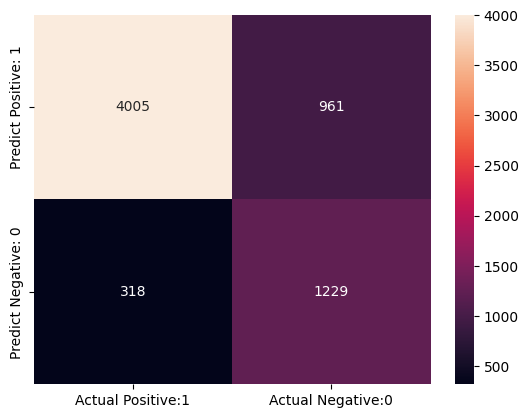

In [187]:
# Visualizing the Confusion Matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                                               index = ['Predict Positive: 1', 'Predict Negative: 0'])
sns.heatmap(cm_matrix, annot = True, fmt = 'd')

### **Classification Report**

In [188]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      4966
        >50K       0.56      0.79      0.66      1547

    accuracy                           0.80      6513
   macro avg       0.74      0.80      0.76      6513
weighted avg       0.84      0.80      0.81      6513



In [189]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [190]:
# Printing Classification Accuracy

classification_acc = (TP + TN) / float(TP + TN + FP + FN)
print('Classification Accuracy: {0:0.4f}'.format(classification_acc))

Classification Accuracy: 0.8036


In [191]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification Error: {0:0.4f}'.format(classification_error))

Classification Error: 0.1964


In [192]:
# Calculating Precision

precision = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precision)) 

Precision: 0.8065


In [193]:
# Calculating recall

recall = TP / float(TP + FN)
print('Recall: {0:0.4f}'.format(recall))

Recall: 0.9264


In [194]:
# Calculating Specificity

specificity = TN / (TN + FP)
print('Specificity: {0:0.4f}'.format(specificity))

Specificity: 0.5612


In [195]:
# Calculating F1-Score

f1_score = 2 * ((precision * recall) / (precision + recall))
print('F1-Score: {0:0.4f}'.format(f1_score))

F1-Score: 0.8623


In [196]:
import pickle

# Save the model to a file
with open('Gaussian_naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(gnb, file)


In [198]:
# Save the encoder
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)